In [1]:
#!pip install -U scikIt-learn
#!pip install imagehash
#!pip install -U matplotlib
#!pip install matplotlib
#!pip install seaborn
#!pip install tqdm

#!pip install scikit-image
#!pip install tqdm


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from time import time

from sklearn.cluster import DBSCAN, KMeans

import seaborn as sns

sns.set()

from PIL import Image

import numpy as np
from numpy import mean
from numpy import isnan
from numpy import asarray

import os
import shutil, glob, os.path

from random import shuffle

from tqdm import tqdm

import math

import skimage
from skimage import data, io, color
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.feature import canny

from random import randint
from sklearn.linear_model import LinearRegression
from scipy import stats



# processamento de imagem

Using Gray Scale Segmentation
files: ['branca01.jpg', 'branca02.jpg', 'branca03.jpg', 'casal_branco01.jpg', 'casal_moreno01.jpg', 'desktop.ini', 'familia_branca01.jpg', 'familia_morena01.jpg', 'homem_branco01.jpg', 'homem_branco02.jpg', 'homem_branco03.jpg', 'homem_branco04.jpg', 'homem_moreno01.jpg', 'homem_moreno02.jpg', 'homem_moreno03.jpg', 'homem_moreno04.jpg', 'image_teste_segementacao_3_classes.png', 'jovem_branco01.jpg', 'jovem_branco02.jpg', 'jovem_branco03.jpg', 'jovem_branco04.jpg', 'jovem_loura01.jpg', 'jovem_moreno01.jpg', 'jovem_moreno02.jpg', 'jovem_moreno03.jpg', 'jovem_moreno04.jpg', 'morena01.jpg', 'morena02.jpg', 'morena03.jpg', 'mulher_morena01.jpg', 'mulher_morena02.jpg', 'mulher_morena03.jpg', 'senhora_branca01.jpg', 'senhora_branca02.jpg', 'senhora_branca03.jpg', 'senhora_branca04.jpg', 'senhora_morena01.jpg', 'senhora_morena02.jpg', 'senhora_morena03.jpg', 'senhora_morena04.jpg', 'senhor_branco01.jpg', 'senhor_branco02.jpg', 'senhor_branco03.jpg', 'senhor_branco

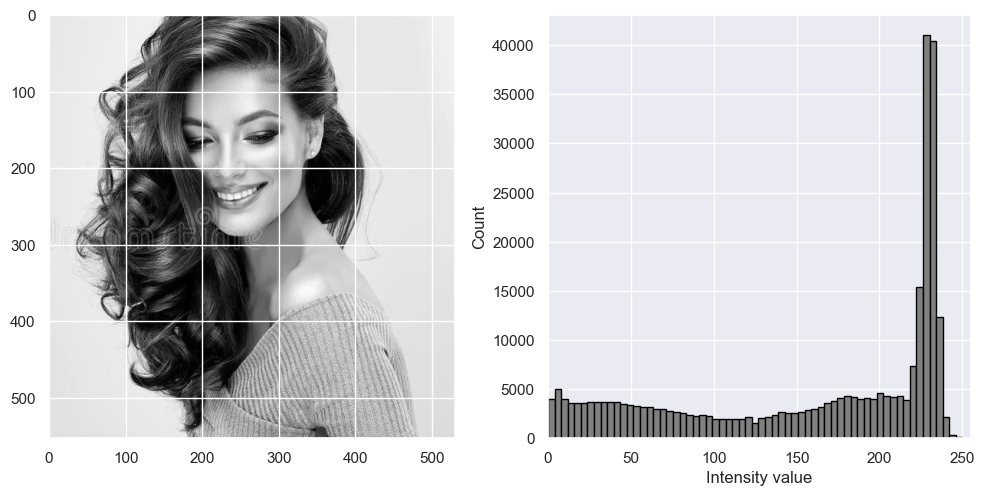

(900, 675, 3)
number of colors 3


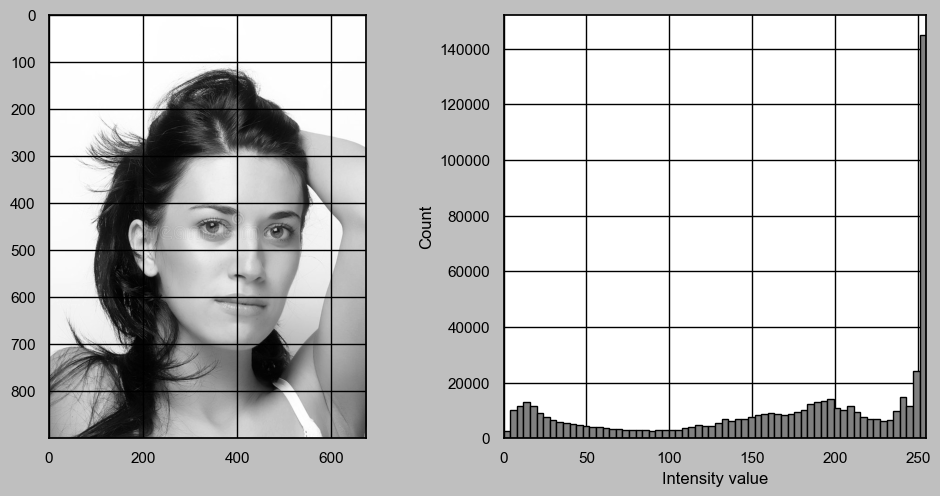

(533, 626, 3)
number of colors 3


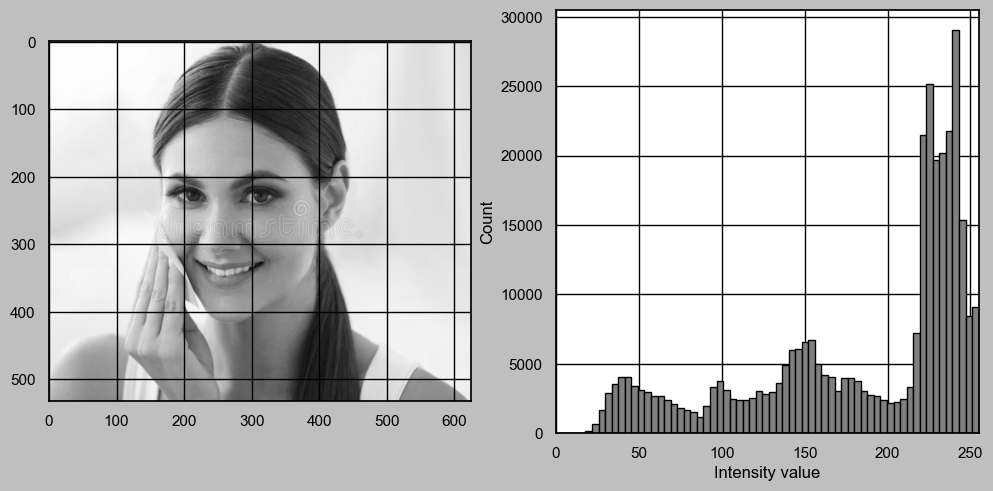

(533, 800, 3)
number of colors 3


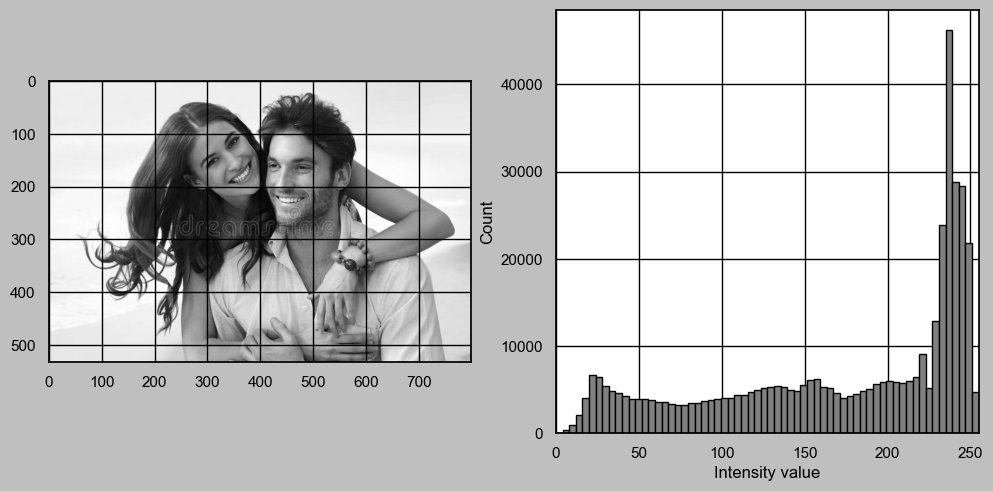

(533, 800, 3)
number of colors 3


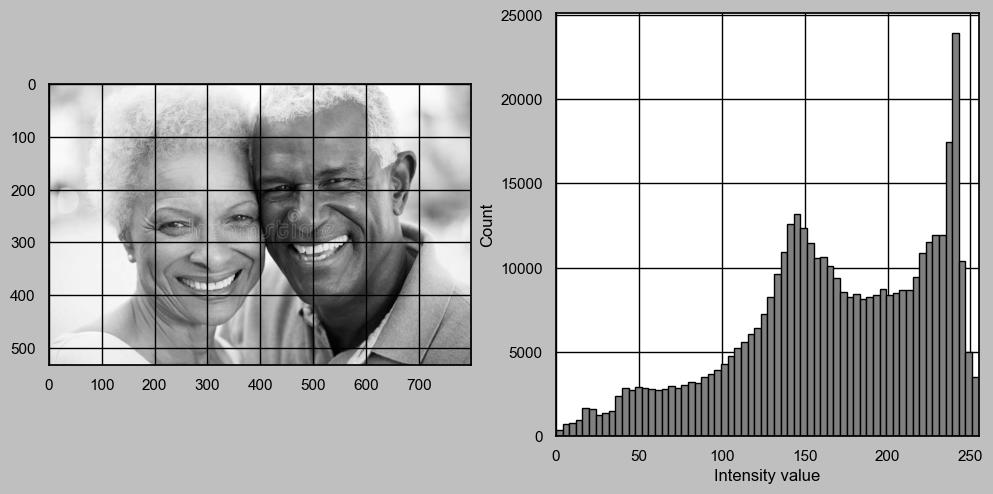

Number of images loaded = 5


In [3]:

as_gray = True

if as_gray:
    print('Using Gray Scale Segmentation')
    
INPUT_PATH = 'faces'

Files = os.listdir(INPUT_PATH)
print('files:', os.listdir(INPUT_PATH))

Img = []
img = []
ncolors = []
ResX = []
ResY = []
n = []
sizes = []
times = []
iterations_all = []



nImg = 6

for filename in Files[:nImg]:
    if filename.endswith('.jpg') or filename.endswith('.png'):
        try:
            img.append(io.imread(INPUT_PATH + '/' + filename))
            print(img[-1].shape)
            Img.append(img)
            fig2, ax2 = plt.subplots(1, 2, figsize=(12, 5.5))
            ncolors.append(img[-1].shape[-1] if len(img[-1].shape) > 2 else 1)
            ResX.append(img[-1].shape[0])
            ResY.append(img[-1].shape[1])
            n.append(ResX[-1] * ResY[-1])
            print('number of colors', ncolors[-1])
            
            if not as_gray:
                ax2[0].imshow(img[-1])
                if ncolors[-1] > 1:
                    ax2[1].hist(img[-1].ravel(), bins=64, color='orange', alpha=0.5)
                    ax2[1].hist(img[-1][:, :, 0].ravel(), bins=64, color='Red', alpha=0.5)
                    ax2[1].hist(img[-1][:, :, 1].ravel(), bins=64, color='Green', alpha=0.5)
                    ax2[1].hist(img[-1][:, :, 2].ravel(), bins=64, color='Blue', alpha=0.5)
                    ax2[1].legend(['Total', 'Red_channel', 'Green_channel', 'Blue_channel'])
            else:
                plt.style.use('grayscale')
                if ncolors[-1] > 1:
                    img[-1] = np.round(255 * rgb2gray(img[-1])).astype(np.uint8)
                ncolors[-1] = 1
                ax2[0].imshow(img[-1], cmap='gray')
                ax2[1].hist(img[-1].ravel(), bins=64, color='gray')
                
            ax2[1].set_xlim(0, 255)
            ax2[1].set_xlabel('Intensity value')
            ax2[1].set_ylabel('Count')
            plt.show()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)

print('Number of images loaded =', len(img))


In [4]:
Images = []

# Garante que nImg não exceda o número real de imagens carregadas
nImg = min(nImg, len(img))

for my_img in range(nImg):
    image = img[my_img]  # Acessa a imagem na lista img
    
    ch = []
    
    for c in range(ncolors[my_img]):
        if ncolors[my_img] > 1:
            ch.append(image[:, :, c].flatten()) #transforma img em vetor
        else:
            ch.append(image.flatten())
            
    print(ch)
    Images.append(np.array(ch))

[array([229, 229, 229, ..., 218, 218, 218], dtype=uint8)]
[array([255, 255, 255, ..., 132, 132, 132], dtype=uint8)]
[array([253, 253, 253, ..., 234, 234, 234], dtype=uint8)]
[array([238, 238, 238, ..., 193, 187, 181], dtype=uint8)]
[array([154, 155, 157, ..., 118, 136, 127], dtype=uint8)]


In [5]:
import random
#gera cores 

my_color = []
my_color.append('#%06X' % 0)          # Preto: '#000000'
my_color.append('#%06X' % 0xFFFFFF)   # Branco: '#FFFFFF'
for i in range(20):
    my_color.append('#%06X' % random.randint(0, 0xFFFFFF))

print(my_color)

['#000000', '#FFFFFF', '#0AF374', '#AB081F', '#6E6C7C', '#CF8F74', '#317D7F', '#30CE28', '#0BAA57', '#6E0604', '#60001D', '#C6AA0B', '#09DEAC', '#1D9DD3', '#A552AE', '#F6E1BF', '#1BB42D', '#F8587E', '#63F668', '#381FEF', '#29A3A9', '#02E2E8']


# Função kmeans

Parâmetros:
   
    - image: Imagem a ser segmentada (vetores de canais de cor).
   
    - K: Número de clusters desejados.
   
    - ncolors: Número de canais de cor da imagem.
  
    - n: Número total de pixels da imagem.
   
    - maximiter: Número máximo de iterações do algoritmo k-means.
    
    Retorna:
    - INIT_TIME: Tempo de inicialização do algoritmo.
    - ITER_TIME: Tempo de iteração do algoritmo.
    - iteracoes: Número de iterações realizadas.
    - classe: Lista de classes atribuídas a cada pixel.
    - cc: Centroides finais dos clusters.

In [6]:
def kmeans(image, K, ncolors, n, maximiter):
    tempo_inicio = time()

    cc= np.zeros((ncolors, K), dtype = int) #cria vetor de centroides

    classe = [-1 for i in range(n)]
    
    #prof diego
    if ncolors > 1:
        cluster_size = []
        for c in range(ncolors):
            cluster_size.append(int((np.max(image[c])-np.min(image[c]))/K))
            cc[c,0] = int(cluster_size[-1]/2)
            for k in range(1,K):
                cc[c,k] = cc[c,k-1] + cluster_size[-1]
    else:    
        cluster_size = int((np.max(image)-np.min(image))/K)
        cc[0,0] = int(cluster_size/2)
        for k in range(1,K):
            cc[0,k] = cc[0,k-1] + cluster_size
    
    INIT_TIME = time()- tempo_inicio
     
    tempo_inicio= time()
    #processo de iteração
    iteracoes = 0

    while True:

        iteracoes += 1                                                                            
 
        if iteracoes>maximiter:                                                                  
            print('convergencia nao atingida em', max_iter,'iterations')
            break
            
        mudanca = 0                                                                              # foca = [0, 0, 0, 1]
        
        for i in range(n):                                                                       # foca = [0, n, n, n+2]
            d_minima = 1e30                                                                      # foca = [0, 0, 0, 1] * n = [0, 0, 0, n]
            k_mais_prox =-1                                                                      # foca = [0, 0, 0, 1] * n =   [0, 0, 0, n]

            for k in range(K):                                                                   # foca = [0, K, K, K+2] * n = [0, nk, nk, nk+2n]
                d=0                                                                              # foca = [0, 0, 0, 1] *n *k = [0,0,0,nk]
            
                for c in range(ncolors):                                                         #c só vai até um(utilizando escala de cinza) foca = [0, ncolors, ncolors,ncolors+2 ] *n*k= [0, nk, nk, 3nk]                                               
                    d += np.abs(image[c][i]-cc[c][k])                                            # foca = [0,2,0,7] *n*k = [0, 2kn, 0 ,7nk]

                if d < d_minima:                                                                 # foca = [0, 0, 1, 2] *n*k = [0, 0, nk, 2nk]
                    d_minima = d                                                                 # foca = [0, 0, 0, 2] *n*k = [0, 0, 0, 2nk]
                    k_mais_prox = k                                                              # foca = [0, 0, 0, 2] *n*k = [0, 0, 0, 2nk]

            if classe[i] != k_mais_prox:                                                         # foca = [0, 0, 1, 2]   *n*k = [0, 0, nk, 2nk]
                classe[i]= k_mais_prox                                                           # foca = [0, 0, 0, 2]   *n*k = [0, 0, 0, 2nk]
                mudanca +=1                                                                      # foca = [0, 1, 0, 2]   *n*k = [0, nk, 0, 2nk]

        if mudanca == 0:                                                                         # foca = [0, 0, 1, 1]   
            ITER_TIME = (time() - tempo_inicio)/iteracoes #prof diego                            # nao contabilizar foca = [1, 2, 0, 3] 
            print("Iterações finalizadas \nTempo médio de iteração: ",ITER_TIME)            
            break
            
        else:                                                                                    #por c ser igual a 1 desconsidere-o dos calculos
            cluster_sz = [0 for k in range(K)]                                                   # foca = [0, K, K, 2K+2] 
            for i in range (n):                                                                  # foca = [0, n, n, n+2] 
                for c in range(ncolors):                                                         # foca = [0, ncolors, ncolors, ncolors+2] *n =[0, n, n, n+2n] 
                    cc[c][classe[i]]+=image[c][i]                                                # foca = [0, 1, 0 8] *n = [0,n, 0, 8n]
                    cluster_sz[classe[i]]+=1                                                     # foca = [0, 1, 0, 3]  * n = [0, n, 0, 3n] 
                    
            for k in range(K):                                                                   # foca = [0, K, K, K+2]
                if cluster_sz[k]> 0:                                                             # foca = [0, 0, 1, 2] *k = [0,0,k, 2k]
                    for c in range(ncolors):                                                    # foca = [0, ncolors, ncolors,ncolors+2 ] *k = [0, k, k,k+2k]
                        cc[c][k] = int(cc[c][k]/cluster_sz[k])                                  # foca = [0, 1, 0, 10] *k =[ 0, k, 0, 10k]
                else:
                    print('cluster', k, 'sem pontos...reinicializando algoritmo')
                    iteracoes=0                                                                 
                    for k in range(K):                                                          
                        p=randint(0,n-1)                                                       
                        for c in range(ncolors):
                            cc[c][k]=image[c,p]                                                 
    return ITER_TIME,iteracoes, classe,cc
            #foca_total= [0 + 5n+5nk+3k (to) + 3n+ 4kn+4k(tc)+20n+ 24kn + 17k+ 10(ta)]

#Calculo para determinar foca total
## - função: 0 
## - operação: 5n+5nk+3k 
## - comparação: 3n+ 4kn+4k
## - atribuição:20n+ 24kn + 17k+ 10
## - soma: 28n + 33kn + 24k + 10

In [7]:
def estimativaTeorica(k,n):
    EFT =(28 * n) + (33 * k *n)+ (24*k)+ 10
    return EFT

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  1.7517129182815552
Iterações finalizadas 
Tempo médio de iteração:  1.6759912371635437
Iterações finalizadas 
Tempo médio de iteração:  1.507492184638977
Iterações finalizadas 
Tempo médio de iteração:  1.4403902292251587
Iterações finalizadas 
Tempo médio de iteração:  1.5102437138557434
Iterações finalizadas 
Tempo médio de iteração:  1.487823724746704
Iterações finalizadas 
Tempo médio de iteração:  1.5335234999656677
Iterações finalizadas 
Tempo médio de iteração:  1.3877432942390442
Iterações finalizadas 
Tempo médio de iteração:  1.4627490639686584
Iterações finalizadas 
Tempo médio de iteração:  1.7050951719284058
Tamanho da imagem: 293643 Numero de Klosters 2 
Tempo de medio de iteração 1.5462765038013457 (Desvio padrao da iteração 0.11573973756852535 ) 
Numero de iterações: 4
Teste de estabilidade
Variabilidade na iteração: 0.07485060872618339
cluster 0 threshold 0 : 133
cluster 1 threshold 134 :

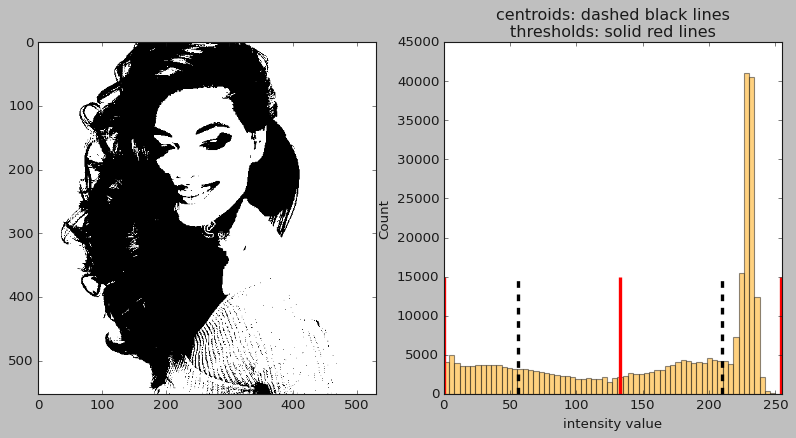

Iterações finalizadas 
Tempo médio de iteração:  2.0726653337478638
Iterações finalizadas 
Tempo médio de iteração:  1.859851896762848
Iterações finalizadas 
Tempo médio de iteração:  1.8313747346401215
Iterações finalizadas 
Tempo médio de iteração:  1.7893616557121277
Iterações finalizadas 
Tempo médio de iteração:  1.7937354445457458
Iterações finalizadas 
Tempo médio de iteração:  1.7839947640895844
Iterações finalizadas 
Tempo médio de iteração:  1.7974898517131805
Iterações finalizadas 
Tempo médio de iteração:  1.8720112442970276
Iterações finalizadas 
Tempo médio de iteração:  1.8673202693462372
Iterações finalizadas 
Tempo médio de iteração:  1.8018616139888763
Tamanho da imagem: 293643 Numero de Klosters 3 
Tempo de medio de iteração 1.8469666808843612 (Desvio padrao da iteração 0.0818476069513609 ) 
Numero de iterações: 8
Teste de estabilidade
Variabilidade na iteração: 0.04431460935298019
cluster 0 threshold 0 : 90
cluster 1 threshold 91 : 181
cluster 2 threshold 182 : 254


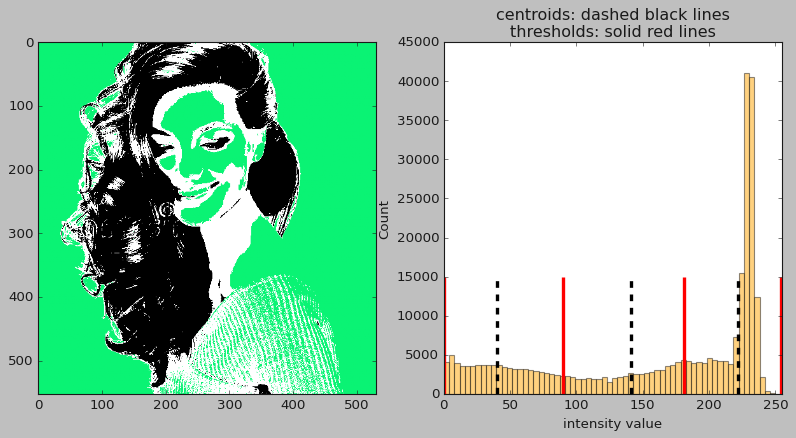

Iterações finalizadas 
Tempo médio de iteração:  2.198035796483358
Iterações finalizadas 
Tempo médio de iteração:  2.223169287045797
Iterações finalizadas 
Tempo médio de iteração:  2.227093497912089
Iterações finalizadas 
Tempo médio de iteração:  2.2083767652511597
Iterações finalizadas 
Tempo médio de iteração:  2.2158327102661133
Iterações finalizadas 
Tempo médio de iteração:  2.2063490549723306
Iterações finalizadas 
Tempo médio de iteração:  2.3388239542643228
Iterações finalizadas 
Tempo médio de iteração:  2.252556800842285
Iterações finalizadas 
Tempo médio de iteração:  2.2118486166000366
Iterações finalizadas 
Tempo médio de iteração:  2.2257471481959024
Tamanho da imagem: 293643 Numero de Klosters 4 
Tempo de medio de iteração 2.230783363183339 (Desvio padrao da iteração 0.03872640630810475 ) 
Numero de iterações: 6
Teste de estabilidade
Variabilidade na iteração: 0.01736000319315721
cluster 0 threshold 0 : 59
cluster 1 threshold 60 : 127
cluster 2 threshold 128 : 195
clu

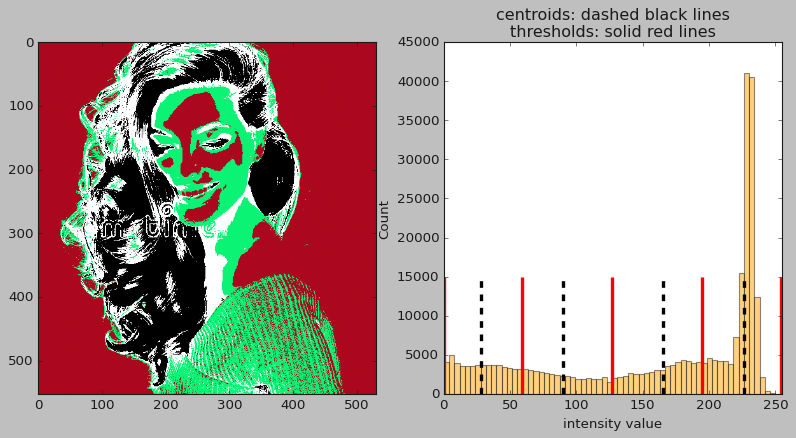

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  2.9101429326193675
Iterações finalizadas 
Tempo médio de iteração:  2.9532384872436523
Iterações finalizadas 
Tempo médio de iteração:  2.8968478611537387
Iterações finalizadas 
Tempo médio de iteração:  3.0118589060647145
Iterações finalizadas 
Tempo médio de iteração:  2.9112413951328824
Iterações finalizadas 
Tempo médio de iteração:  2.872856446674892
Iterações finalizadas 
Tempo médio de iteração:  2.867605345589774
Iterações finalizadas 
Tempo médio de iteração:  2.8568691866738454
Iterações finalizadas 
Tempo médio de iteração:  2.8649472168513705
Iterações finalizadas 
Tempo médio de iteração:  3.046856096812657
Tamanho da imagem: 607500 Numero de Klosters 2 
Tempo de medio de iteração 2.919246387481689 (Desvio padrao da iteração 0.06190602964344788 ) 
Numero de iterações: 7
Teste de estabilidade
Variabilidade na iteração: 0.02120616810863012
cluster 0 threshold 0 : 136
cluster 1 threshold 137 : 2

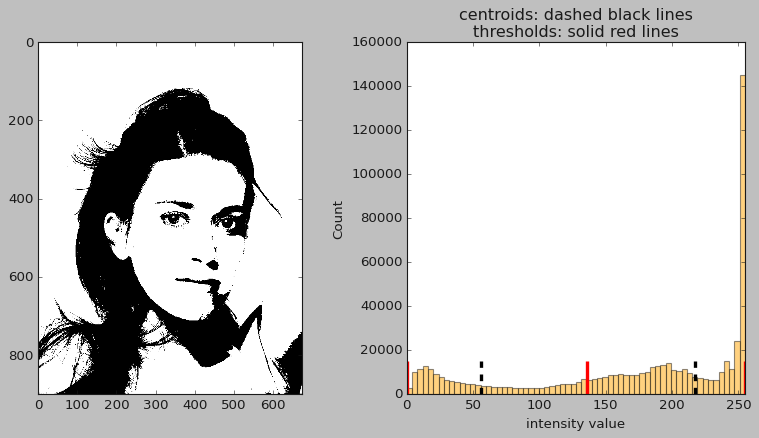

Iterações finalizadas 
Tempo médio de iteração:  3.7130381531185574
Iterações finalizadas 
Tempo médio de iteração:  3.7772223949432373
Iterações finalizadas 
Tempo médio de iteração:  3.753555350833469
Iterações finalizadas 
Tempo médio de iteração:  3.8798051940070257
Iterações finalizadas 
Tempo médio de iteração:  3.768999179204305
Iterações finalizadas 
Tempo médio de iteração:  3.770787477493286
Iterações finalizadas 
Tempo médio de iteração:  3.888270060221354
Iterações finalizadas 
Tempo médio de iteração:  3.7625893221961126
Iterações finalizadas 
Tempo médio de iteração:  3.7631340821584067
Iterações finalizadas 
Tempo médio de iteração:  3.764801449245877
Tamanho da imagem: 607500 Numero de Klosters 3 
Tempo de medio de iteração 3.784220266342164 (Desvio padrao da iteração 0.05265052247477251 ) 
Numero de iterações: 9
Teste de estabilidade
Variabilidade na iteração: 0.013913175969977199
cluster 0 threshold 0 : 98
cluster 1 threshold 99 : 201
cluster 2 threshold 202 : 255


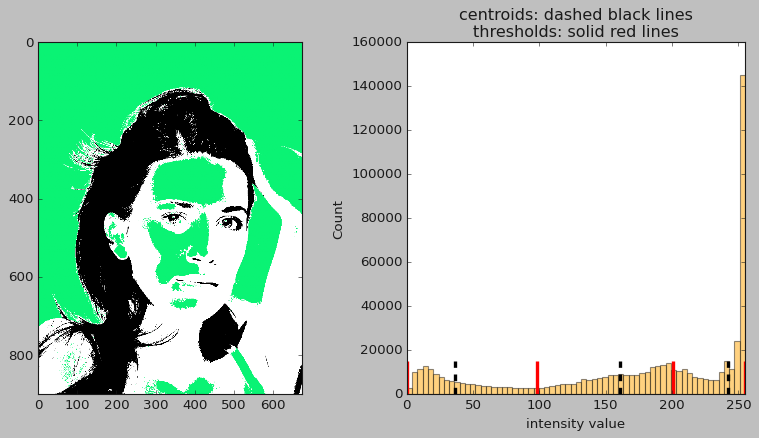

Iterações finalizadas 
Tempo médio de iteração:  4.678437675748553
Iterações finalizadas 
Tempo médio de iteração:  4.564506360462734
Iterações finalizadas 
Tempo médio de iteração:  4.581226519175938
Iterações finalizadas 
Tempo médio de iteração:  4.591714535440717
Iterações finalizadas 
Tempo médio de iteração:  4.545577798570905
Iterações finalizadas 
Tempo médio de iteração:  4.6383450882775445
Iterações finalizadas 
Tempo médio de iteração:  4.539040207862854
Iterações finalizadas 
Tempo médio de iteração:  4.601142355373928
Iterações finalizadas 
Tempo médio de iteração:  4.530311788831439
Iterações finalizadas 
Tempo médio de iteração:  4.607813698904855
Tamanho da imagem: 607500 Numero de Klosters 4 
Tempo de medio de iteração 4.587811602864947 (Desvio padrao da iteração 0.04406224391186754 ) 
Numero de iterações: 14
Teste de estabilidade
Variabilidade na iteração: 0.009604196450515107
cluster 0 threshold 0 : 76
cluster 1 threshold 77 : 155
cluster 2 threshold 156 : 217
cluste

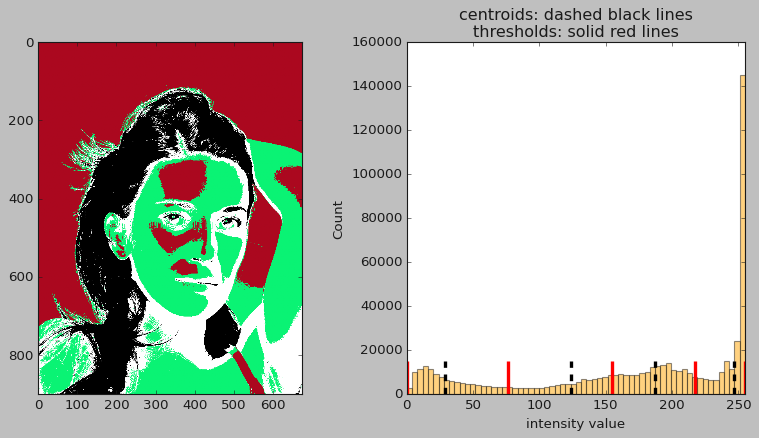

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  1.5731264750162761
Iterações finalizadas 
Tempo médio de iteração:  1.5711106459299724
Iterações finalizadas 
Tempo médio de iteração:  1.578110482957628
Iterações finalizadas 
Tempo médio de iteração:  1.5653543207380507
Iterações finalizadas 
Tempo médio de iteração:  1.5746238496568468
Iterações finalizadas 
Tempo médio de iteração:  1.6232916514078777
Iterações finalizadas 
Tempo médio de iteração:  1.668046686384413
Iterações finalizadas 
Tempo médio de iteração:  1.5744602680206299
Iterações finalizadas 
Tempo médio de iteração:  1.581232229868571
Iterações finalizadas 
Tempo médio de iteração:  1.5729125340779622
Tamanho da imagem: 333658 Numero de Klosters 2 
Tempo de medio de iteração 1.5882269144058228 (Desvio padrao da iteração 0.030667962440030182 ) 
Numero de iterações: 9
Teste de estabilidade
Variabilidade na iteração: 0.019309559712066385
cluster 0 threshold 2 : 164
cluster 1 threshold 165 

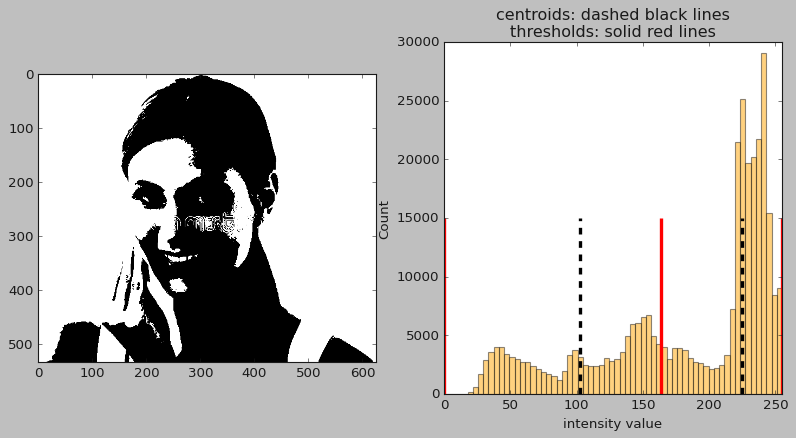

Iterações finalizadas 
Tempo médio de iteração:  2.0642442405223846
Iterações finalizadas 
Tempo médio de iteração:  2.029645413160324
Iterações finalizadas 
Tempo médio de iteração:  2.0336812138557434
Iterações finalizadas 
Tempo médio de iteração:  2.1297488808631897
Iterações finalizadas 
Tempo médio de iteração:  2.075137495994568
Iterações finalizadas 
Tempo médio de iteração:  2.047100782394409
Iterações finalizadas 
Tempo médio de iteração:  2.033170074224472
Iterações finalizadas 
Tempo médio de iteração:  2.0318912863731384
Iterações finalizadas 
Tempo médio de iteração:  2.0247966647148132
Iterações finalizadas 
Tempo médio de iteração:  2.0581843852996826
Tamanho da imagem: 333658 Numero de Klosters 3 
Tempo de medio de iteração 2.0527600437402724 (Desvio padrao da iteração 0.030200793548856672 ) 
Numero de iterações: 8
Teste de estabilidade
Variabilidade na iteração: 0.014712286339044632
cluster 0 threshold 2 : 106
cluster 1 threshold 107 : 190
cluster 2 threshold 191 : 25

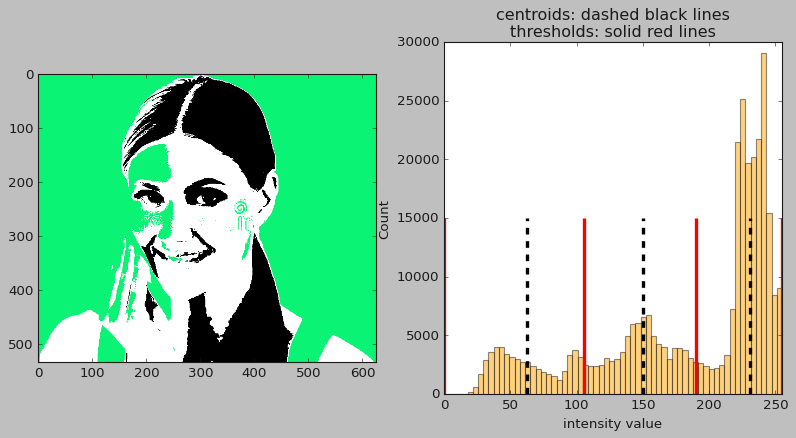

Iterações finalizadas 
Tempo médio de iteração:  2.6653940677642822
Iterações finalizadas 
Tempo médio de iteração:  2.614415943622589
Iterações finalizadas 
Tempo médio de iteração:  2.545872151851654
Iterações finalizadas 
Tempo médio de iteração:  2.4932865500450134
Iterações finalizadas 
Tempo médio de iteração:  2.5004326701164246
Iterações finalizadas 
Tempo médio de iteração:  2.4867640137672424
Iterações finalizadas 
Tempo médio de iteração:  2.583289533853531
Iterações finalizadas 
Tempo médio de iteração:  2.5442439913749695
Iterações finalizadas 
Tempo médio de iteração:  2.479774385690689
Iterações finalizadas 
Tempo médio de iteração:  2.491619646549225
Tamanho da imagem: 333658 Numero de Klosters 4 
Tempo de medio de iteração 2.540509295463562 (Desvio padrao da iteração 0.05977864325859218 ) 
Numero de iterações: 8
Teste de estabilidade
Variabilidade na iteração: 0.02353018088354779
cluster 0 threshold 2 : 78
cluster 1 threshold 79 : 134
cluster 2 threshold 135 : 196
clus

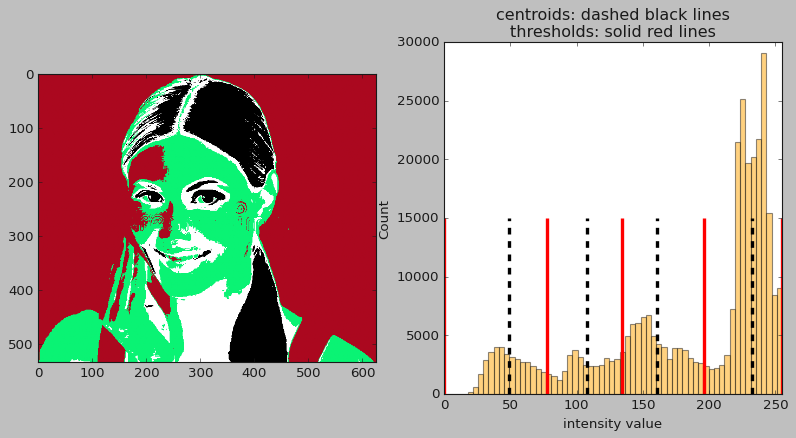

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  2.005155086517334
Iterações finalizadas 
Tempo médio de iteração:  2.0007286752973283
Iterações finalizadas 
Tempo médio de iteração:  2.006474086216518
Iterações finalizadas 
Tempo médio de iteração:  2.0749879564557756
Iterações finalizadas 
Tempo médio de iteração:  2.0842844418116977
Iterações finalizadas 
Tempo médio de iteração:  2.017298494066511
Iterações finalizadas 
Tempo médio de iteração:  2.019906895501273
Iterações finalizadas 
Tempo médio de iteração:  2.018474953515189
Iterações finalizadas 
Tempo médio de iteração:  2.0378971781049455
Iterações finalizadas 
Tempo médio de iteração:  2.0298311029161726
Tamanho da imagem: 426400 Numero de Klosters 2 
Tempo de medio de iteração 2.029503887040274 (Desvio padrao da iteração 0.027302424836392107 ) 
Numero de iterações: 7
Teste de estabilidade
Variabilidade na iteração: 0.013452758090652678
cluster 0 threshold 0 : 151
cluster 1 threshold 152 : 2

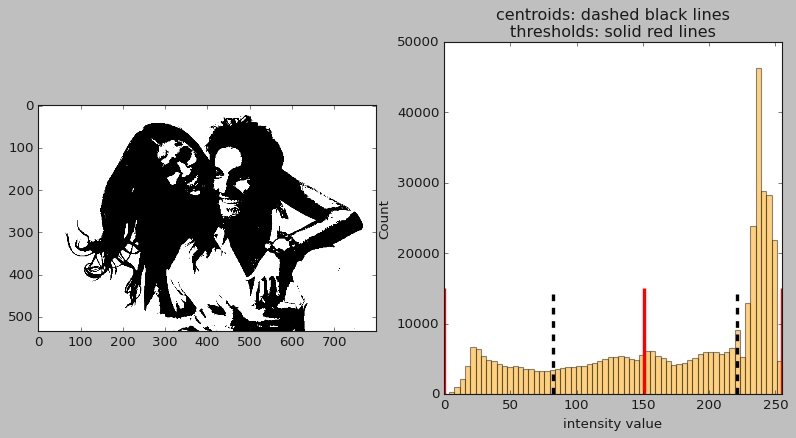

Iterações finalizadas 
Tempo médio de iteração:  2.652944008509318
Iterações finalizadas 
Tempo médio de iteração:  2.8329998122321234
Iterações finalizadas 
Tempo médio de iteração:  2.61836658583747
Iterações finalizadas 
Tempo médio de iteração:  2.693092849519518
Iterações finalizadas 
Tempo médio de iteração:  2.794905106226603
Iterações finalizadas 
Tempo médio de iteração:  2.9068320857153997
Iterações finalizadas 
Tempo médio de iteração:  2.985541264216105
Iterações finalizadas 
Tempo médio de iteração:  2.631580008400811
Iterações finalizadas 
Tempo médio de iteração:  2.7246402899424234
Iterações finalizadas 
Tempo médio de iteração:  2.6488347583346896
Tamanho da imagem: 426400 Numero de Klosters 3 
Tempo de medio de iteração 2.7489736768934465 (Desvio padrao da iteração 0.11994054972062282 ) 
Numero de iterações: 9
Teste de estabilidade
Variabilidade na iteração: 0.04363102881951381
cluster 0 threshold 0 : 96
cluster 1 threshold 97 : 186
cluster 2 threshold 187 : 255


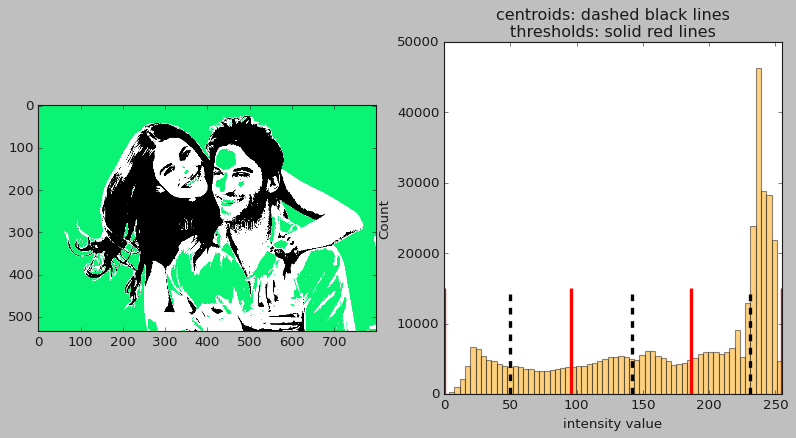

Iterações finalizadas 
Tempo médio de iteração:  3.4655822856085643
Iterações finalizadas 
Tempo médio de iteração:  3.3715640817369734
Iterações finalizadas 
Tempo médio de iteração:  3.4280222484043668
Iterações finalizadas 
Tempo médio de iteração:  3.3886057308741977
Iterações finalizadas 
Tempo médio de iteração:  3.670616166932242
Iterações finalizadas 
Tempo médio de iteração:  3.3976397854941234
Iterações finalizadas 
Tempo médio de iteração:  3.3669356959206715
Iterações finalizadas 
Tempo médio de iteração:  3.3061802898134505
Iterações finalizadas 
Tempo médio de iteração:  3.319120032446725
Iterações finalizadas 
Tempo médio de iteração:  3.2250289916992188
Tamanho da imagem: 426400 Numero de Klosters 4 
Tempo de medio de iteração 3.393929530893053 (Desvio padrao da iteração 0.11222597604584703 ) 
Numero de iterações: 14
Teste de estabilidade
Variabilidade na iteração: 0.03306667832207958
cluster 0 threshold 0 : 75
cluster 1 threshold 76 : 141
cluster 2 threshold 142 : 203


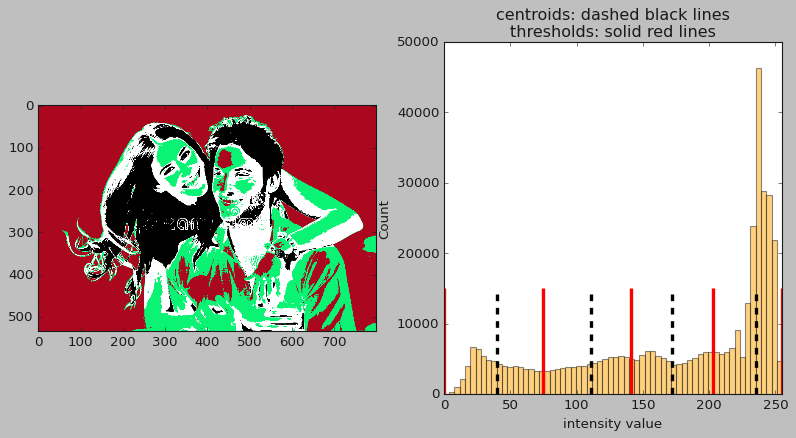

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  2.013902020454407
Iterações finalizadas 
Tempo médio de iteração:  2.105299973487854
Iterações finalizadas 
Tempo médio de iteração:  2.0322001934051515
Iterações finalizadas 
Tempo médio de iteração:  2.0147002935409546
Iterações finalizadas 
Tempo médio de iteração:  2.0266091346740724
Iterações finalizadas 
Tempo médio de iteração:  2.032122039794922
Iterações finalizadas 
Tempo médio de iteração:  2.038599991798401
Iterações finalizadas 
Tempo médio de iteração:  2.14530234336853
Iterações finalizadas 
Tempo médio de iteração:  2.0319360494613647
Iterações finalizadas 
Tempo médio de iteração:  2.0227214813232424
Tamanho da imagem: 426400 Numero de Klosters 2 
Tempo de medio de iteração 2.04633935213089 (Desvio padrao da iteração 0.0411578970895067 ) 
Numero de iterações: 10
Teste de estabilidade
Variabilidade na iteração: 0.020112938280079616
cluster 0 threshold 0 : 161
cluster 1 threshold 162 : 255


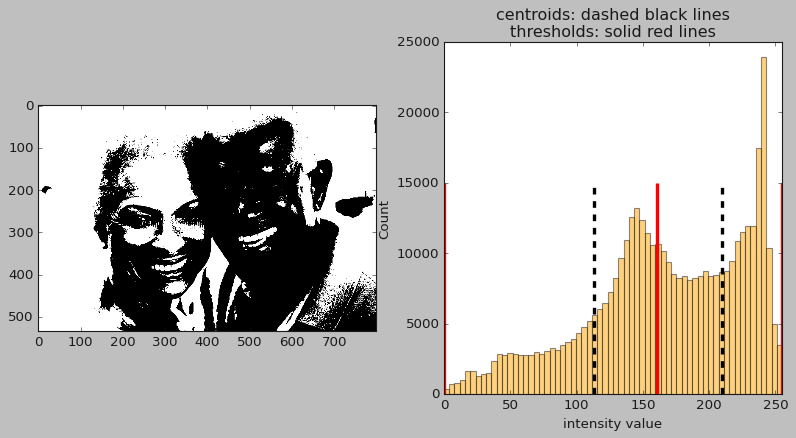

Iterações finalizadas 
Tempo médio de iteração:  2.853657775455051
Iterações finalizadas 
Tempo médio de iteração:  2.7717761993408203
Iterações finalizadas 
Tempo médio de iteração:  2.8557758596208362
Iterações finalizadas 
Tempo médio de iteração:  2.814222044414944
Iterações finalizadas 
Tempo médio de iteração:  2.7368882762061224
Iterações finalizadas 
Tempo médio de iteração:  2.7571563720703125
Iterações finalizadas 
Tempo médio de iteração:  2.5929894182417126
Iterações finalizadas 
Tempo médio de iteração:  2.7046644422743054
Iterações finalizadas 
Tempo médio de iteração:  2.604571130540636
Iterações finalizadas 
Tempo médio de iteração:  2.600230746799045
Tamanho da imagem: 426400 Numero de Klosters 3 
Tempo de medio de iteração 2.7291932264963785 (Desvio padrao da iteração 0.0962881479301085 ) 
Numero de iterações: 9
Teste de estabilidade
Variabilidade na iteração: 0.03528081009262913
cluster 0 threshold 0 : 107
cluster 1 threshold 108 : 185
cluster 2 threshold 186 : 255


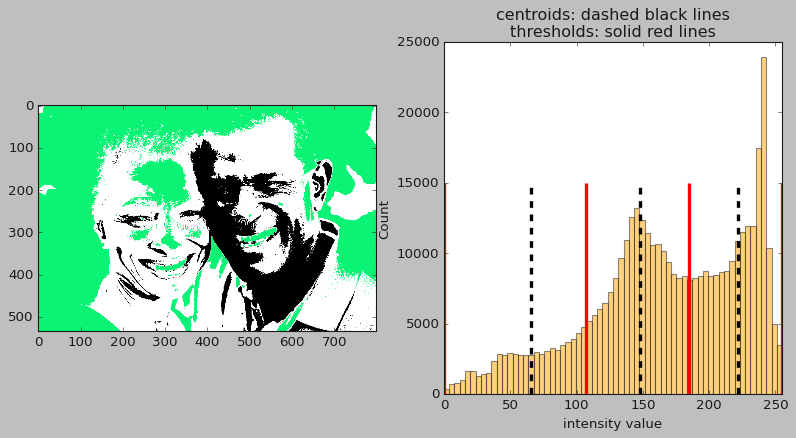

Iterações finalizadas 
Tempo médio de iteração:  3.2543373221442815
Iterações finalizadas 
Tempo médio de iteração:  3.2597718920026506
Iterações finalizadas 
Tempo médio de iteração:  3.2674961430685863
Iterações finalizadas 
Tempo médio de iteração:  3.237772521518526
Iterações finalizadas 
Tempo médio de iteração:  3.277581873394194
Iterações finalizadas 
Tempo médio de iteração:  3.2041948636372886
Iterações finalizadas 
Tempo médio de iteração:  3.279682170777094
Iterações finalizadas 
Tempo médio de iteração:  3.2269370555877686
Iterações finalizadas 
Tempo médio de iteração:  3.231618915285383
Iterações finalizadas 
Tempo médio de iteração:  3.4973257269178117
Tamanho da imagem: 426400 Numero de Klosters 4 
Tempo de medio de iteração 3.2736718484333585 (Desvio padrao da iteração 0.07793974903816361 ) 
Numero de iterações: 21
Teste de estabilidade
Variabilidade na iteração: 0.023808051828854593
cluster 0 threshold 0 : 91
cluster 1 threshold 92 : 150
cluster 2 threshold 151 : 200


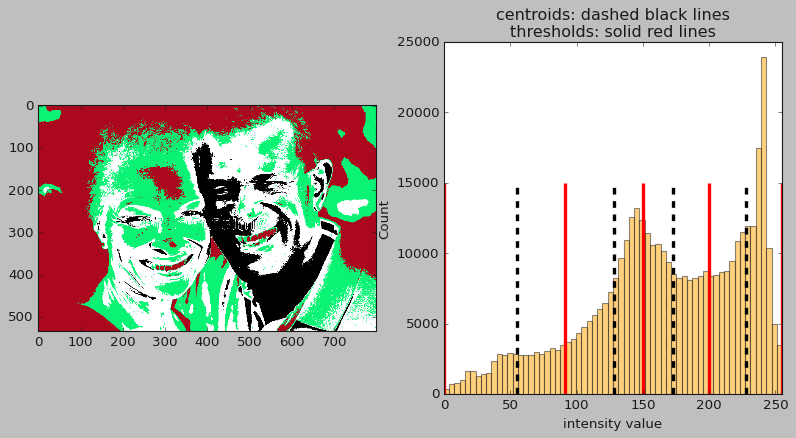

In [8]:
plt.style.use('classic')

RODADAS_BENCHMARK =10
MIN_CLUSTERS = 2
MAX_CLUSTERS = 4

L = 256

for i in range(nImg):
    print('n K inTime (std) iterations(std)')
    x=ResX[i]
    y= ResY[i]
    N=x*y

    for K in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
        #InTime=[] não vai ser util para essa analise
        ItTime=[]
        Iter=[]

        for bench in range(RODADAS_BENCHMARK):
            IterTime, iterations, classe, centros = kmeans(Images[i], K, ncolors[i], N, 100)

            #InTime.append(InitTime)
            ItTime.append(IterTime)
            Iter.append(iterations)

        sizes.append(N)
        times.append(np.mean(ItTime))
        iterations_all.append(np.mean(Iter))

        print('Tamanho da imagem:',N, 'Numero de Klosters',K, '\nTempo de medio de iteração',np.mean(ItTime), '(Desvio padrao da iteração', np.std(ItTime), ')', '\nNumero de iterações:',int(np.mean(Iter)))            
        
        print('Teste de estabilidade')
        print('Variabilidade na iteração:',(np.std(ItTime)/np.mean(ItTime)))
        OrderOf = np.argsort(centros)[0]

        up=[]
        dw=[]
            
        for k in range(K):
            clsslst = np.argwhere(np.array(classe)== k)
            clsspxls= Images[i][0][clsslst]
            up.append(np.max(clsspxls))
            dw.append(np.min(clsspxls))
            print('cluster', k, 'threshold', dw[-1],':', up[-1])

        Mask = []
        for j in range(N):
            Mask.append(colors.hex2color(my_color[OrderOf[classe[j]]]))

        fig,ax = plt.subplots(1,2, figsize=(12,5.5))
        ax[0].imshow(np.array(Mask).reshape(x,y,-1))
        ax[1].hist(np.array(Images[i]).ravel(), bins=64, color= 'orange', alpha =0.5)
        ax[1].set_xlim(0,L-1)
                     
        if ncolors[i] > 1 :
            C=[]
            for k in range(K):
                C.append(int(0.2989*centros[0][k]+0.5870*centros[1][k]+0.1140*centros[2][k]))
        else:
            C=centros
        ax[1].vlines(C,0,15000, linestyle='dashed', linewidths=3, colors='black')
        ax[1].vlines([0]+up,0,15000, linestyle='solid', linewidths=3, colors='red')
        ax[1].set_xlabel('intensity value')
        ax[1].set_ylabel('Count')
        ax[1].set_title('centroids: dashed black lines\nthresholds: solid red lines')
        plt.show()

In [9]:
sizes = np.array(sizes).reshape(-1, 1)
times = np.array(times)

In [10]:
def plotRegressao(x, y, titlex, titley):
    # Calcular a regressão linear
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(x, y, label='Pontos')
    plt.plot(x, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    
    # Adicionar legenda para a equação da linha (posição ajustada para a esquerda)
    plt.text(0.05, 0.85, f'{titley} = {slope:.2g}n + {intercept:.2g}', fontsize=12, ha='left', va='top', transform=plt.gca().transAxes)
    
    # Adicionar legendas (posição na lateral inferior)
    plt.xlabel(titlex)
    plt.ylabel(titley)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.02), shadow=True, ncol=2)
    
    # Exibir o gráfico
    plt.show()
    return slope


# Plotagem de Gráficos
## analise qualitativa das primitivas

Quantidade de cluesters: 2


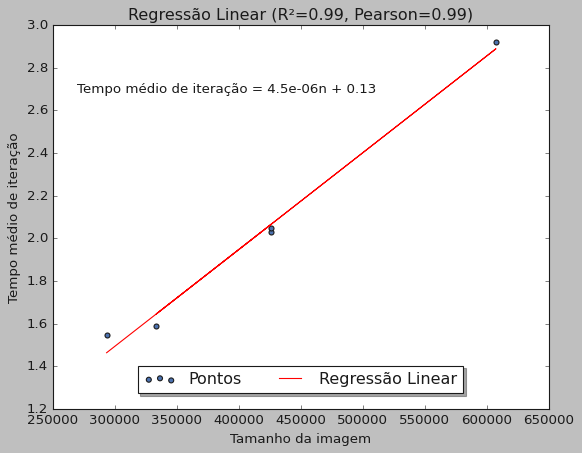

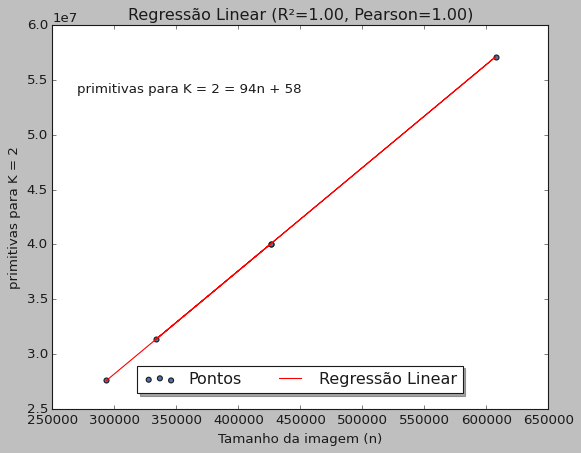

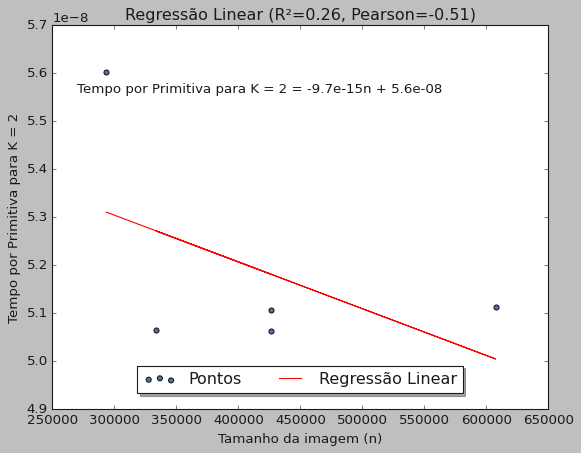

Quantidade de cluesters: 3


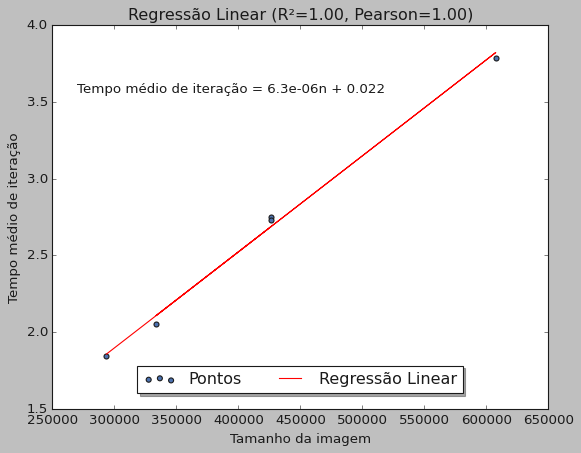

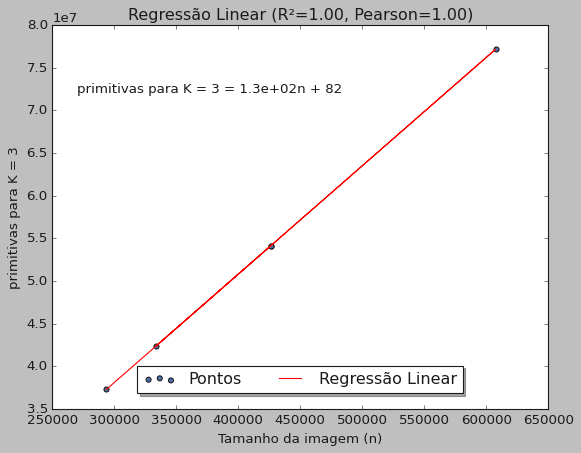

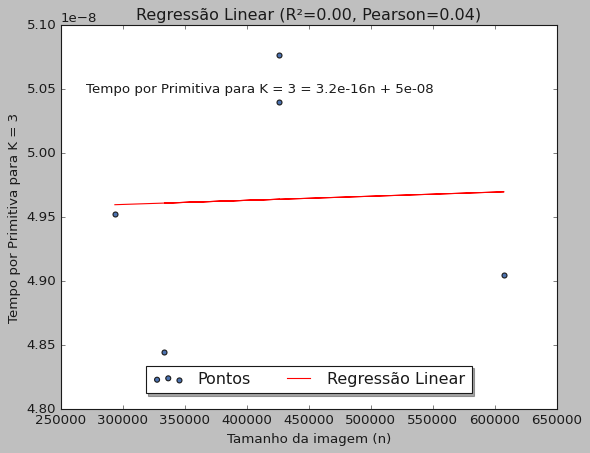

Quantidade de cluesters: 4


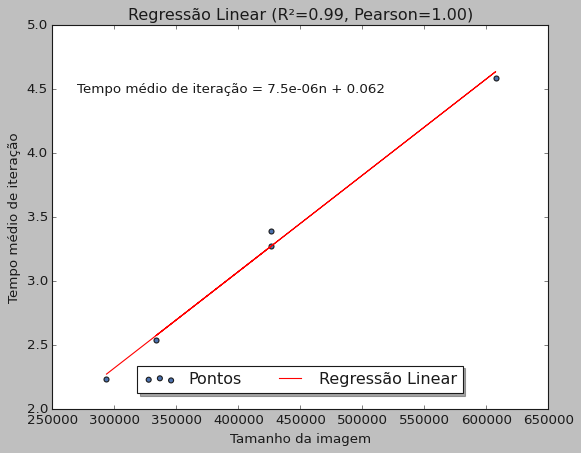

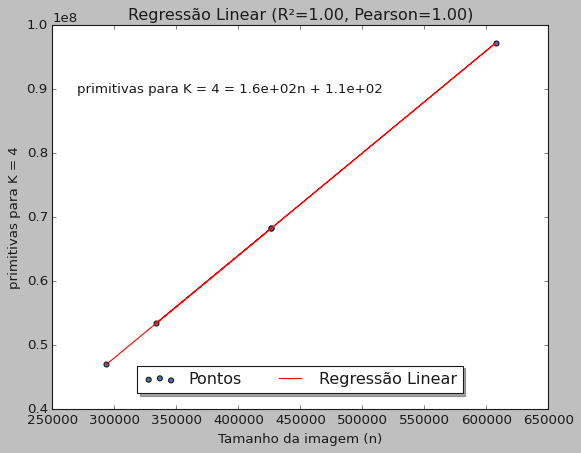

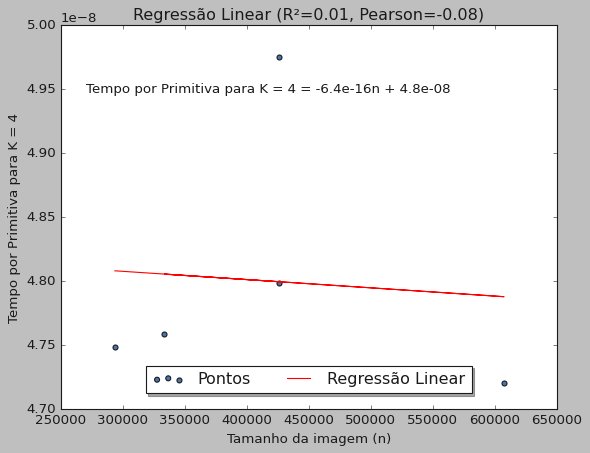

In [36]:
sizes = np.array(sizes).reshape(-1, 1)
times = np.array(times)
slopes =[]

EFT_T2= []
EFT_T2 = []
tempos_4k = []


for K in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    print('Quantidade de cluesters:', K)
    # Filtrar os dados para o valor específico de K
    sizes_K = sizes[K-MIN_CLUSTERS::MAX_CLUSTERS-MIN_CLUSTERS+1].flatten()
    times_K = times[K-MIN_CLUSTERS::MAX_CLUSTERS-MIN_CLUSTERS+1] 
    slopes_K = plotRegressao(sizes_K, times_K, 'Tamanho da imagem', 'Tempo médio de iteração')
    slopes.append(slopes_K)
    

    EFT_values = [estimativaTeorica(K, n) for n in sizes_K]
    plotRegressao(sizes_K, EFT_values, 'Tamanho da imagem (n)', 'primitivas para K = {}'.format(K))
    tempos_por_primitiva = [times_K[i] / EFT_values[i] for i in range(len(times_K))]
    plotRegressao(sizes_K, tempos_por_primitiva, 'Tamanho da imagem (n)', 'Tempo por Primitiva para K = {}'.format(K))

Quantidade de clusters: 2


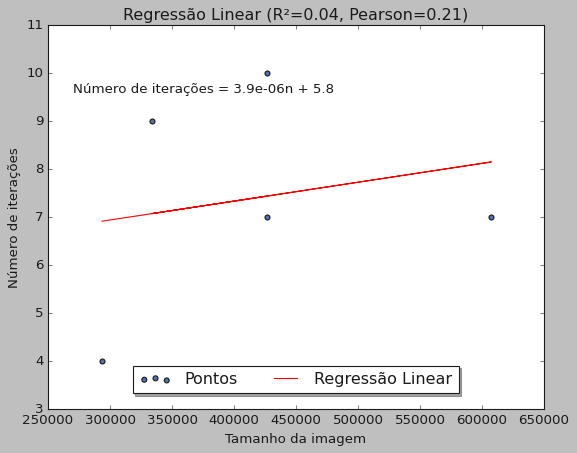

Quantidade de clusters: 3


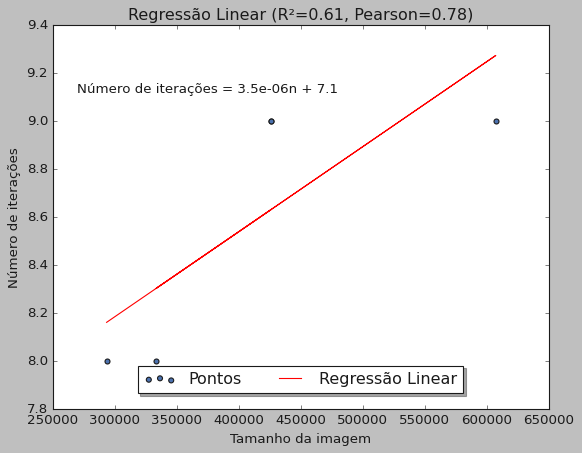

Quantidade de clusters: 4


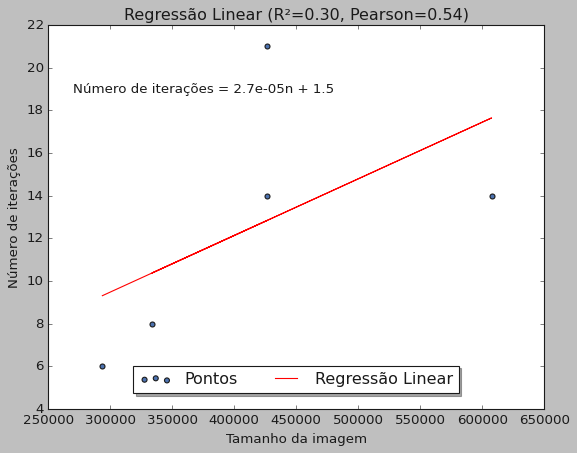

In [37]:
for K in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):
    print('Quantidade de clusters:', K)
    sizes_K = sizes[K - MIN_CLUSTERS::MAX_CLUSTERS - MIN_CLUSTERS + 1].flatten()
    iterations_K = iterations_all[K - MIN_CLUSTERS::MAX_CLUSTERS - MIN_CLUSTERS + 1]
    
    plotRegressao(sizes_K, iterations_K, 'Tamanho da imagem', 'Número de iterações')

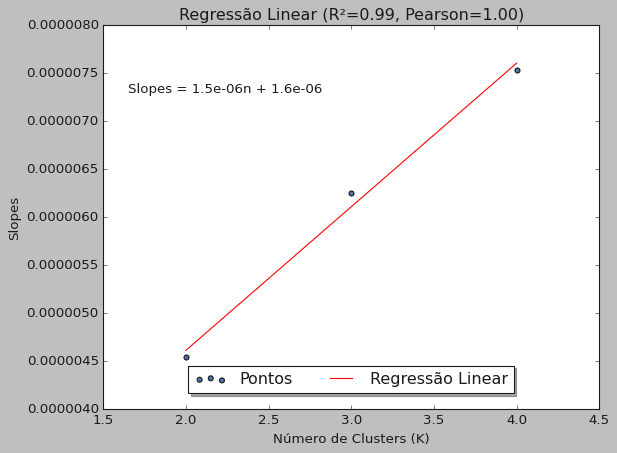

1.495457198263458e-06

In [13]:
K_values = np.arange(MIN_CLUSTERS, MAX_CLUSTERS + 1)
plotRegressao(K_values, slopes, 'Número de Clusters (K)', 'Slopes')



# Introdução

Este relatório analisa o uso do algoritmo k-means para processamento de imagens, com o objetivo de mensurar sua complexidade e identificar os fatores que mais influenciam essa complexidade. O k-means é um algoritmo de aprendizado de máquina não supervisionado que visa dividir um conjunto de N observações em K clusters onde cada observação é atribuída ao cluster cujo centróide está mais próximo, minimizando assim a variância dentro dos clusters.


# metodologia


A partir de sete imagens de diferentes dimensões, convertidas para escala de cinza utilizando a função `rgb2gray`, foi realizada a clusterização utilizando o algoritmo k-means. Foram conduzidos experimentos com 2, 3 e 4 clusters, onde  N refere-se ao tamanho da imagem. Para cada imagem, foram realizadas 10 rodadas de benchmark.

Para cada imagem, foram calculadas as seguintes métricas:

- Tempo médio de iteração
- Desvio padrão do tempo de iteração
- Número de iterações
- Variabilidade na iteração
- Thresholds dos clusters
- Testes de estabilidade

Essas métricas permitiram uma análise da complexidade do algoritmo k-means e dos fatores que influenciam seu desempenho.


# Resultados


Com base nas métricas supracitadas, foram plotados gráficos que evidenciaram os seguintes resultados:
O tamanho da imagem (NNN) tem um impacto maior no tempo de processamento em comparação com a quantidade de clusters utilizados. Embora o tempo aumente proporcionalmente com o aumento do número de clusters, esse aumento não é tão significativo quanto a relação entre o tamanho da imagem e o tempo de processamento.
Além disso, foi observado que aparentemente não existe uma relação clara entre o tempo médio de iteração e o número de iterações.
Esses resultados destacam a importância do tamanho da imagem como um fator crítico na performance do algoritmo k-means, enquanto a quantidade de clusters tem um impacto menos pronunciado no tempo de execução.



